In [13]:
from tensorflow import keras

model = keras.models.load_model("../model/english.h5")
model.load_weights('../model/weights.h5')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [14]:
with open('../data/english/preprocessed.csv', newline='') as f:
    df = pd.read_csv(f)

In [15]:
multiplied_by = np.load("../model/mutiplied_by.npy")
added = np.load("../model/added.npy")

In [16]:
# scale to put into the NN
scaled = df.drop('word', axis=1).values
scaled = [row * multiplied_by + added for row in scaled]
scaled_df = pd.DataFrame(scaled, columns=df.drop('word', axis=1).columns.values)

In [20]:
# add prediction column
df['prediction']=model.predict(scaled_df.drop('level', axis=1))
df.loc[df['prediction']<0, 'prediction'] = 0
df.loc[df['prediction']>1, 'prediction'] = 1
df

,word,count,length,level,common,vowel,syllable,prediction
0,the,23135851162,3.0,1,1,0.333333,1,0.000000
1,of,13151942776,2.0,1,1,0.500000,1,0.000000
2,and,12997637966,3.0,1,1,0.333333,1,0.000000
3,to,12136980858,2.0,1,1,0.500000,1,0.000000
4,a,9081174698,1.0,1,1,1.000000,1,0.000000
...,...,...,...,...,...,...,...,...
333328,gooek,12711,5.0,-1,0,0.600000,1,0.721829
333329,gooddg,12711,6.0,-1,0,0.333333,1,0.676865
333330,gooblle,12711,7.0,-1,0,0.428571,2,0.669326
333331,gollgo,12711,6.0,-1,0,0.333333,2,0.676690


C:\Users\Owner\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Owner\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([4.70000e+01, 1.30000e+02, 1.10100e+03, 8.53000e+02, 9.00000e+02,
        5.51000e+02, 3.59000e+02, 6.03000e+02, 2.53000e+03, 2.82600e+03,
        3.21300e+03, 6.96200e+03, 2.83400e+04, 2.38501e+05, 3.26510e+04,
        5.27600e+03, 6.36100e+03, 5.59000e+02, 9.73000e+02, 5.95000e+02]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ],
       dtype=float32),
 <a list of 20 Patch objects>)

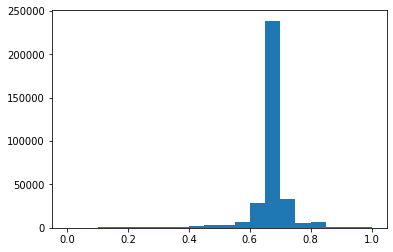

In [21]:
plt.hist(df['prediction'], bins=20)

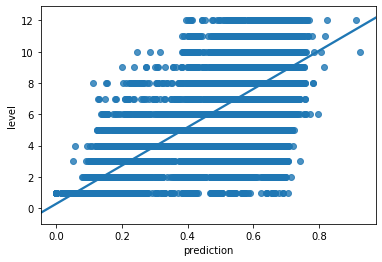

In [22]:
import seaborn as sns

p = sns.regplot(df[df['level']>=0]['prediction'], df[df['level']>=0]['level'])

In [23]:
import scipy
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),y=p.get_lines()[0].get_ydata())
print(f"y = {slope} * x + {intercept}")

y = 12.231620342146973 * x + 0.28323676714423573


In [24]:
# using the regression line to get the level
def fit_to_line(row):
    if row['level']==-1:
        row['level']=row['prediction']*slope+intercept
    return row

df = df.progress_apply(fit_to_line, axis=1)

100%|████████████| 333333/333333 [01:05<00:00, 5057.63it/s]


In [25]:
df

,word,count,length,level,common,vowel,syllable,prediction
0,the,23135851162,3.0,1.000000,1,0.333333,1,0.000000
1,of,13151942776,2.0,1.000000,1,0.500000,1,0.000000
2,and,12997637966,3.0,1.000000,1,0.333333,1,0.000000
3,to,12136980858,2.0,1.000000,1,0.500000,1,0.000000
4,a,9081174698,1.0,1.000000,1,1.000000,1,0.000000
...,...,...,...,...,...,...,...,...
333328,gooek,12711,5.0,9.112377,0,0.600000,1,0.721829
333329,gooddg,12711,6.0,8.562395,0,0.333333,1,0.676865
333330,gooblle,12711,7.0,8.470178,0,0.428571,2,0.669326
333331,gollgo,12711,6.0,8.560252,0,0.333333,2,0.676690


In [30]:
df['freq']=np.log10(df['count'])

In [31]:
df

,word,count,length,level,common,vowel,syllable,prediction,freq
0,the,23135851162,3.0,1.000000,1,0.333333,1,0.000000,10.364285
1,of,13151942776,2.0,1.000000,1,0.500000,1,0.000000,10.118990
2,and,12997637966,3.0,1.000000,1,0.333333,1,0.000000,10.113864
3,to,12136980858,2.0,1.000000,1,0.500000,1,0.000000,10.084111
4,a,9081174698,1.0,1.000000,1,1.000000,1,0.000000,9.958142
...,...,...,...,...,...,...,...,...,...
333328,gooek,12711,5.0,9.112377,0,0.600000,1,0.721829,4.104180
333329,gooddg,12711,6.0,8.562395,0,0.333333,1,0.676865,4.104180
333330,gooblle,12711,7.0,8.470178,0,0.428571,2,0.669326,4.104180
333331,gollgo,12711,6.0,8.560252,0,0.333333,2,0.676690,4.104180


In [32]:
df.to_csv("../data/english/result.csv",index=False)